# Persistent homology of activations

In this notebook we will show how the layers of a neural network trained on a classifiction task transforms the input data cloud.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import torch

import sys
sys.path.append("..")
from gdeep.neural_nets import sample_nn
from gdeep.neural_nets.utility import train_classification_nn, Layers_list, get_activations
from gdeep.neural_nets.persistence_activations import persistence_diagrams_of_activations, plot_persistence_diagrams

from sklearn import datasets

ImportError: cannot import name 'plot_persistence_diagrams' from 'gdeep.neural_nets.persistence_activations' (/home/rapael/Syzygia_owncloud/EPFL/giotto-deep/gdeep/neural_nets/persistence_activations.py)

In [30]:
# Create labeled point cloud data

n_samples = 1000

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.3,
                                    noise=.05)


X = noisy_circles[0]
y = noisy_circles[1]

# Tranform to torch.tensor

X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).long()

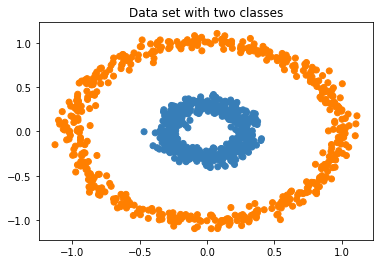

In [31]:
# Plot data set X, y

label_color = ['#377eb8' if lab else '#ff7f00' for lab in y.tolist()]

plt.scatter(X[:,0],X[:,1],
                color=label_color)

plt.title("Data set with two classes")
plt.show()

In [32]:
# Build NN
nodes_layer_1 = 32
dropout_p_layer_1 = 0.7
n_epochs = 2000
learning_rate = 0.01

nn_1 = sample_nn.SimpleNN(nodes_layer_1=nodes_layer_1, dropout_p=dropout_p_layer_1)

In [35]:
# Train NN

train_classification_nn(nn_1, X_tensor, y_tensor)

99 0.6929678320884705
199 0.6703563332557678
299 0.6137224435806274
399 0.5890660881996155
499 0.5747055411338806
599 0.5714908242225647
699 0.5616836547851562
799 0.5457470417022705
899 0.5308505296707153
999 0.5174890160560608


In [54]:
# Visualize activations

# Persistence diagrams of layerwise activations for the training set

persistence_diagrams = persistence_diagrams_of_activations(nn_1, X_tensor, homology_dimensions=[0,1])

plot_persistence_diagrams(persistence_diagrams)

NameError: name 'plot_persistence_diagrams' is not defined